## Optical Bangla Printed Character recognition using template matching / ANN


(933, 600)


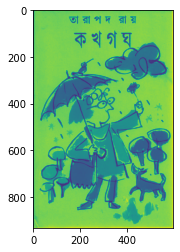

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
im= cv2.imread('bangla.jpg',0)
plt.imshow(im)
print(im.shape)

### Preprocessing - image enhancement

### Histogram processing

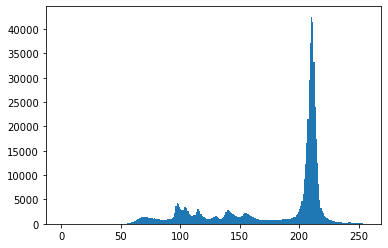

[[212 211 208 ... 225 238 241]
 [173 175 176 ... 217 229 237]
 [123 129 134 ... 209 219 230]
 ...
 [196 172 138 ... 240 243 244]
 [221 194 157 ... 246 248 248]
 [237 209 171 ... 253 254 253]]


In [3]:
im.ravel()
plt.hist(im.ravel(),256,[0,256]);
plt.show()
a=np.asarray(im)
print(a)

### Histogram Equalization

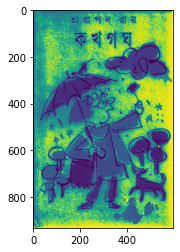

In [4]:
equ = cv2.equalizeHist(im)
#out_img = np.hstack((im,equ))
cv2.imwrite('Equalization_image.jpg',equ)
plt.imshow(equ)


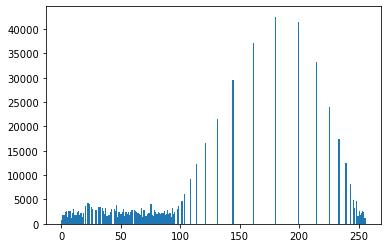

[[214 199 144 ... 251 254 254]
 [ 83  84  84 ... 245 253 254]
 [ 49  52  55 ... 161 248 253]
 ...
 [ 93  83  58 ... 254 254 254]
 [249  91  75 ... 255 255 255]
 [254 161  82 ... 255 255 255]]


In [7]:
equ.ravel()
plt.hist(equ.ravel(),256,[0,256]);
plt.show()
a=np.asarray(equ)
print(a)

## Noise reduction

In [8]:
from skimage.util import random_noise
from numpy import asarray
from scipy import ndimage

### Lowpass filtering

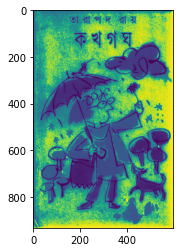

In [9]:
lowkernel = np.array([[1/9,1/9,1/9],
                     [1/9,1/9,1/9],
                     [1/9,1/9,1/9]])
lowpass = cv2.filter2D(src=equ,kernel=lowkernel,ddepth=-1)
plt.imshow(lowpass)

### Median Filtering

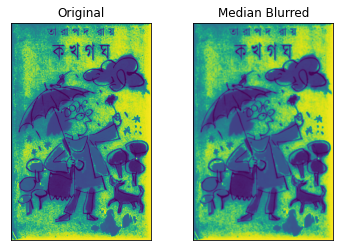

In [10]:
blur=cv2.blur(equ,(5,5))
median=cv2.medianBlur(equ,(5))
plt.subplot(121), plt.imshow(equ), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Max Filtering

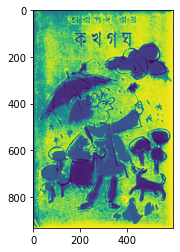

In [11]:
from PIL import Image, ImageFilter
im1=Image.open('Equalization_image.jpg')
im2=im1.filter(ImageFilter.MaxFilter(size=3))
#max_img=np.hstack((im1,im2))
plt.imshow(im2)

### Min Filtering

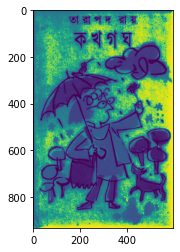

In [24]:
#Min Filtering
im3=im1.filter(ImageFilter.MinFilter(size=3))
#=np.hstack((im1,im3))
plt.imshow(im3)


In [13]:

def binarize_lib(image_file='min filter.png', thresh_val=127, with_plot=False, gray_scale=False):
    image_src =  cv2.imread('min filter.png',0)
    th, image_b = cv2.threshold(src=image_src, thresh=122, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Equalization image')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

True

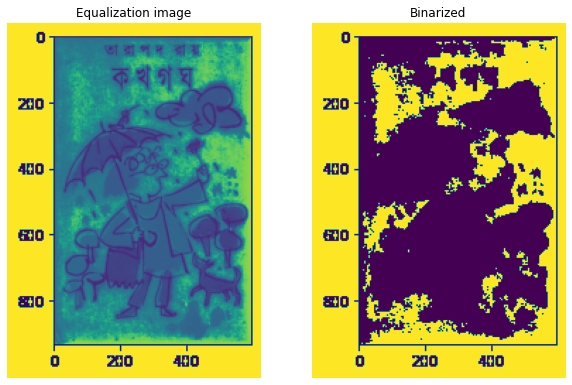

In [14]:
binarize_lib(image_file='min filter.png', with_plot=True)

### Line segmentation

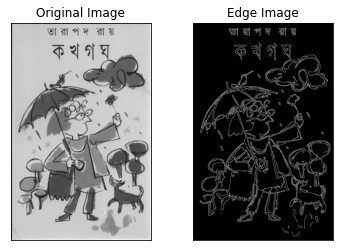

In [15]:
edges = cv2.Canny(im,100,200)

plt.subplot(121),plt.imshow(im,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
cv2.imwrite('Edge image.jpg',equ)

plt.show()

### word segmentation

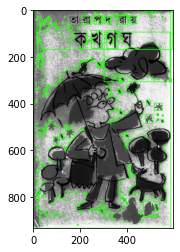

In [16]:
image = cv2.imread('Equalization_image.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1
plt.imshow(image)


(<AxesSubplot:title={'center':'skeletonized image'}>,
 Text(0.5, 1.0, 'skeletonized image'))

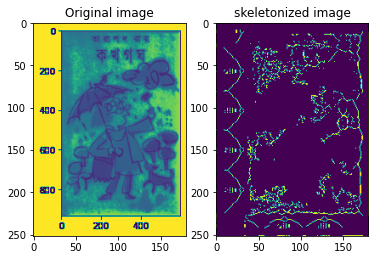

In [17]:
img = cv2.imread('min filter.png',0)
plt.subplot(121),plt.imshow(img),plt.title('Original image')
ret,img = cv2.threshold(img, 127, 255, 0)

size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(img, open)
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    if cv2.countNonZero(img)==0:
        break
plt.subplot(122),plt.imshow(skel),plt.title('skeletonized image')

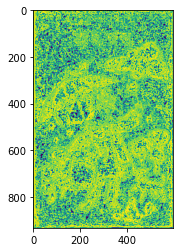

In [18]:
#THINNING
kernel = np.ones((5,5), np.uint8) 
img_erosion = cv2.erode(img, kernel, iterations=1) 
thin = np.zeros(equ.shape,dtype='uint8')
img_erosion = cv2.erode(equ, kernel, iterations=1) 
opening = cv2.morphologyEx(equ, cv2.MORPH_OPEN, kernel)
subset_img = img_erosion-opening
thin = cv2.bitwise_or(subset_img,thin)
plt.imshow(thin)

In [29]:
from math import sqrt
from itertools import chain

In [30]:
%matplotlib inline

In [38]:
for i, row in enumerate(im):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(207, 341) 255


In [40]:
im[3:6, 19:22]

array([[210, 209, 209],
       [208, 207, 208],
       [204, 205, 207]], dtype=uint8)

In [42]:
directions = [ 200,  211, 212,
               217,      213,
               216, 215,  214]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if im[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if image[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

KeyError: 5

In [43]:
print(count)
print(chain)

0
[200]


In [ ]:
plt.imshow(im, cmap='Greys')
plt.plot([i[1] for i in border], [i[0] for i in border])

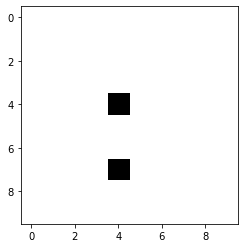

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
freeman_code = [3, 3, 3, 6, 6, 4, 6, 7, 7, 0, 0, 6]
img = np.zeros((10,10))
x, y = 4, 4 
img[y][x] = 1
for direction in freeman_code:
    if direction in [1,2,3]:
        y -= 1
    if direction in [5,6,7]:
        y += 1
    if direction in [3,4,5]:
        x -= 1
    if direction in [0,1,7]:
        x += 1
img[y][x] = 1
plt.imshow(img, cmap='binary', vmin=0, vmax=1)
plt.show()